In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
merge_fert = pd.read_csv(r"C:\Users\hp\Desktop\FertilizerData.csv")
merge_fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.50
1,97,rice,80,40,40,5.52
2,194,rice,80,40,40,5.54
3,291,rice,80,40,40,5.56
4,388,rice,80,40,40,5.58


In [4]:
del merge_fert['Unnamed: 0']

In [5]:
merge_fert.describe()

,N,P,K,pH
count,440.000000,440.000000,440.000000,440.000000
mean,50.454545,45.681818,48.181818,5.409091
std,35.521147,31.920154,50.567293,0.587221
min,20.000000,10.000000,10.000000,3.820000
25%,20.000000,20.000000,20.000000,5.320000
50%,30.000000,40.000000,30.000000,5.480000
75%,80.000000,60.000000,50.000000,5.620000
max,120.000000,125.000000,200.000000,6.680000


In [6]:
merge_fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

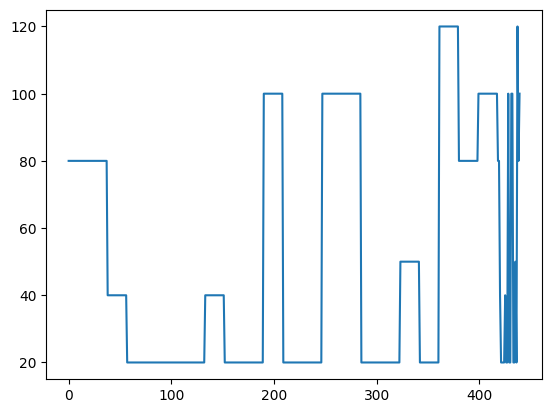

In [7]:
plt.plot(merge_fert['N'])

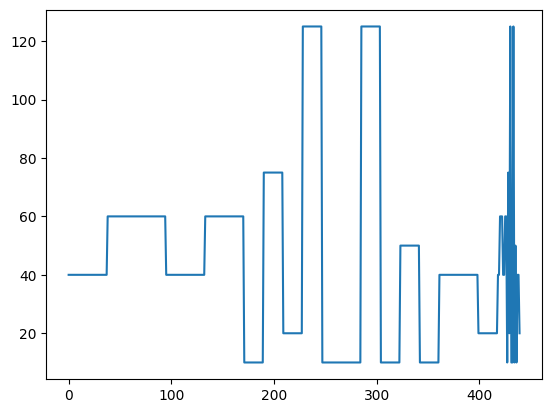

In [8]:
plt.plot(merge_fert['P'])

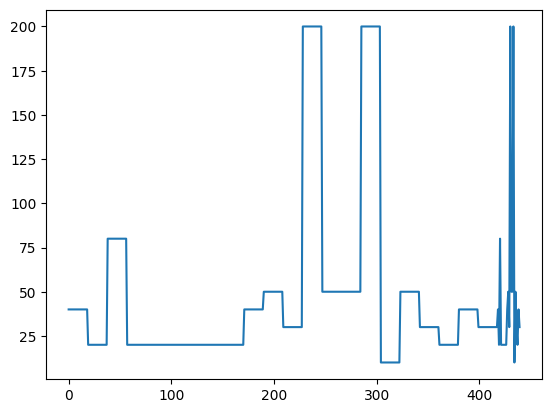

In [9]:
plt.plot(merge_fert['K'])

C:\Users\hp\AppData\Local\Temp\ipykernel_24444\1113100110.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merge_fert.corr(),annot=True)


<AxesSubplot: >

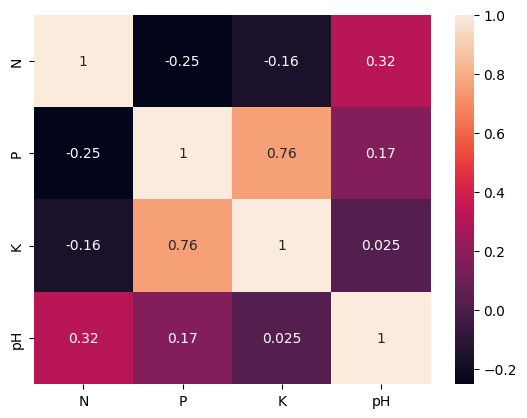

In [10]:
sns.heatmap(merge_fert.corr(),annot=True)

In [11]:
merge_crop = pd.read_csv(r"C:\Users\hp\Desktop\MergeFileCrop.csv")
reco_fert = merge_fert

In [12]:
merge_crop.head()

,Unnamed: 0,temperature,humidity,ph,rainfall,label
0,0,20.879744,82.002744,6.502985,202.935536,rice
1,1,21.770462,80.319644,7.038096,226.655537,rice
2,2,23.004459,82.320763,7.840207,263.964248,rice
3,3,26.491096,80.158363,6.980401,242.864034,rice
4,4,20.130175,81.604873,7.628473,262.717340,rice


In [13]:
import random
temp = pd.DataFrame(columns=['N','P','K'])
for i in range(0,merge_crop.shape[0]):
    crop = merge_crop.label.iloc[i]
    N = reco_fert[reco_fert['Crop']==crop]['N'].iloc[0] + random.randint(-20,20)
    P = reco_fert[reco_fert['Crop']==crop]['P'].iloc[0] + random.randint(-5,20)
    K = reco_fert[reco_fert['Crop']==crop]['K'].iloc[0] + random.randint(-5,5)
    d = {"N":N,"P":P,"K":K}
    
    temp = pd.concat([temp, pd.DataFrame([list(d.values())], columns=['N','P','K'])], ignore_index=True)

In [14]:
temp

,N,P,K
0,77,52,39
1,64,43,41
2,92,47,36
3,69,41,38
4,76,56,41
...,...,...,...
2195,89,29,30
2196,96,28,30
2197,109,28,27
2198,89,38,28


In [15]:
merge_crop.shape

(2200, 6)

In [16]:
reco_fert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Crop    440 non-null    object 
 1   N       440 non-null    int64  
 2   P       440 non-null    int64  
 3   K       440 non-null    int64  
 4   pH      440 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 17.3+ KB


In [17]:
reco_fert.head()

,Crop,N,P,K,pH
0,rice,80,40,40,5.50
1,rice,80,40,40,5.52
2,rice,80,40,40,5.54
3,rice,80,40,40,5.56
4,rice,80,40,40,5.58


In [18]:
merge_crop.head()

,Unnamed: 0,temperature,humidity,ph,rainfall,label
0,0,20.879744,82.002744,6.502985,202.935536,rice
1,1,21.770462,80.319644,7.038096,226.655537,rice
2,2,23.004459,82.320763,7.840207,263.964248,rice
3,3,26.491096,80.158363,6.980401,242.864034,rice
4,4,20.130175,81.604873,7.628473,262.717340,rice


In [19]:
temp.shape

(2200, 3)

In [20]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [21]:
merge_crop.head()

,Unnamed: 0,temperature,humidity,ph,rainfall,label,N,P,K
0,0,20.879744,82.002744,6.502985,202.935536,rice,77,52,39
1,1,21.770462,80.319644,7.038096,226.655537,rice,64,43,41
2,2,23.004459,82.320763,7.840207,263.964248,rice,92,47,36
3,3,26.491096,80.158363,6.980401,242.864034,rice,69,41,38
4,4,20.130175,81.604873,7.628473,262.717340,rice,76,56,41


In [22]:
del merge_crop['Unnamed: 0']

In [23]:
merge_crop = merge_crop[['N','P','K','temperature','humidity','ph','rainfall','label']]

In [24]:
merge_crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,77,52,39,20.879744,82.002744,6.502985,202.935536,rice
1,64,43,41,21.770462,80.319644,7.038096,226.655537,rice
2,92,47,36,23.004459,82.320763,7.840207,263.964248,rice
3,69,41,38,26.491096,80.158363,6.980401,242.864034,rice
4,76,56,41,20.130175,81.604873,7.628473,262.717340,rice


In [25]:
merge_crop.to_csv(r"C:\Users\hp\Desktop\Mini-Project-1\Data-raw\recomendationData.csv",index=False)

In [26]:
df = pd.read_csv(r"C:\Users\hp\Desktop\Mini-Project-1\Data-raw\recomendationData.csv")

In [27]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,77,52,39,20.879744,82.002744,6.502985,202.935536,rice
1,64,43,41,21.770462,80.319644,7.038096,226.655537,rice
2,92,47,36,23.004459,82.320763,7.840207,263.964248,rice
3,69,41,38,26.491096,80.158363,6.980401,242.864034,rice
4,76,56,41,20.130175,81.604873,7.628473,262.717340,rice


In [28]:
df.shape

(2200, 8)